## Cross-Validation

### `Set aside holdout data from train`

In [59]:
#Set aside holdout data from train
from sklearn.model_selection import train_test_split
train_X, holdout_X, train_y, holdout_y = train_test_split(train_X_full, train_y_full, test_size=0.20,random_state=11, shuffle=True)

In [60]:
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

def train_and_valid(what_model, num_folds, X, y):
    fold_rsme=[]
    kf=KFold(n_splits=num_folds, shuffle=True, random_state=30)    
        
    for train_index, valid_index in kf.split(X):                         #split train data excluding holdout
        #Clone is copy of model not yet fit on any data.  Initial conditions impact certain model results, like SGD.
        clone_model = clone(what_model)                                  
        trn_X, valid_X = X.iloc[train_index, :], X.iloc[valid_index, :]  #df has columns
        trn_y, valid_y = y.iloc[train_index], y.iloc[valid_index]        #series no columns

        clone_model.fit(trn_X, trn_y)
        valid_pred=clone_model.predict(valid_X)
        fold_rsme.append(round(np.sqrt(mean_squared_error(valid_y, valid_pred)), 6))
    return fold_rsme, clone_model

In [61]:
#Train and Score LR CV
lr=LinearRegression(fit_intercept=True)
fold_rsme, linMod = train_and_valid(what_model=lr, num_folds=10, X=train_X, y=train_y)
print('Fold RSME:', fold_rsme)
print('## Avg RMSE:', round(np.mean(fold_rsme),4),'+-', round(np.std(fold_rsme),4))
print('## LR R^2:', round(linMod.score(train_X, train_y),3))

#Score holdout
holdout_pred = linMod.predict(holdout_X)
print('\n## holdout RMSE:', round(np.sqrt(mean_squared_error(holdout_y, holdout_pred)), 4))
print('## holdout LR R^2:', round(linMod.score(holdout_X, holdout_y),4))

Fold RSME: [0.133905, 0.10186, 0.100289, 0.100382, 0.101139, 0.100048, 0.126798, 0.088748, 0.108231, 0.124164]
## Avg RMSE: 0.1086 +- 0.0139
## LR R^2: 0.952

## holdout RMSE: 0.1376
## holdout LR R^2: 0.8743


In [62]:
#Train and Score Ridge CV
ridge=Ridge(alpha=15)
fold_rsme, ridgeMod = train_and_valid(what_model=ridge, num_folds=10, X=train_X, y=train_y)
print('Fold RSME:', fold_rsme)
print('## Avg RMSE:', round(np.mean(fold_rsme),4),'+-', round(np.std(fold_rsme),4))
print('## ridge R^2:', round(ridgeMod.score(train_X, train_y),3))

#Score holdout
holdout_pred = ridgeMod.predict(holdout_X)
print('\n## holdout RMSE:', round(np.sqrt(mean_squared_error(holdout_y, holdout_pred)), 4))
print('## holdout R^2:', round(ridgeMod.score(holdout_X, holdout_y),4))

Fold RSME: [0.1578, 0.091111, 0.097205, 0.106716, 0.105574, 0.098144, 0.117009, 0.0888, 0.090521, 0.120327]
## Avg RMSE: 0.1073 +- 0.0197
## ridge R^2: 0.943

## holdout RMSE: 0.1206
## holdout R^2: 0.9034


### `Train Final Model on Full Data and Do Predictions`

In [63]:
train_X_full.shape

(1458, 197)

#### FINAL - Best Model for Kaggle Predictions

In [64]:
from sklearn.metrics import mean_squared_error
rr=Ridge(alpha=15)
rr.fit(train_X_full, train_y_full)
y_pred_rr=rr.predict(train_X_full)
RMSE = rmse=round(np.sqrt(mean_squared_error(train_y_full, y_pred_rr)), 4)
print('RMSE:', RMSE)
print('R^2:', round(rr.score(train_X_full, train_y_full),4))

RMSE: 0.0982
R^2: 0.9396


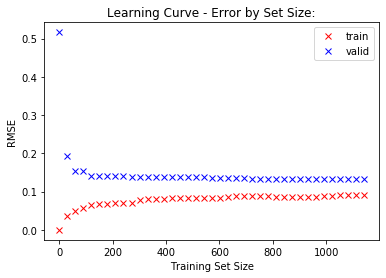

In [65]:
#Assess FINAL overfit/underfit
plot_learn_curve(model = rr, X=train_X_full, y=train_y_full, step=30)

In [92]:
for i in zip(train_X_full.columns, np.round(rr.coef_,4)):
    print(i)

('LotFrontage', 0.0024)
('LotArea', 0.055)
('LandContour', 0.0064)
('OverallQual', 0.0279)
('OverallCond', 0.0465)
('MasVnrArea', 0.0006)
('BsmtQual', 0.0017)
('BsmtCond', -0.0034)
('BsmtFinType1', 0.003)
('BsmtFinSF1', 0.0021)
('BsmtFinType2', 0.0028)
('BsmtFinSF2', -0.0235)
('BsmtUnfSF', -0.0011)
('1stFlrSF', 0.0037)
('2ndFlrSF', 0.0016)
('GrLivArea', 0.0113)
('BedroomAbvGr', -0.01)
('KitchenAbvGr', -0.0368)
('KitchenQual', 0.0222)
('TotRmsAbvGrd', 0.0053)
('Functional', -0.0132)
('Fireplaces', 0.0203)
('GarageFinish', 0.0094)
('GarageCars', 0.0244)
('PavedDrive', 0.0056)
('MiscVal', -0.006)
('TOT_SF', 0.0019)
('House_Age', -0.0188)
('Yrs_Since_Remod', -0.0044)
('Total_Bathrooms', 0.0221)
('Total_Porch_SF', 0.0014)
('has2ndfloor', -0.0088)
('hasbsmt', -0.0214)
('hasgarage', -0.0154)
('hasfireplace', 0.0106)
('GarageQC', 0.0111)
('OverallQual TOT_SF', -0.0049)
('KitchenQual TOT_SF', -0.013)
('TOT_SF ExterQC', 0.0049)
('OverallQual GrLivArea', 0.0306)
('OverallQual Total_Bathrooms', 0.

#### Do Kaggle Predictions

In [66]:
#Predict test and inverse normalize prediction.  Johnson normalization would need inversion.
test_pred=rr.predict(test_X_full)
test_pred=np.exp(test_pred)-1
test_pred[0:5]

array([113595.6318689 , 161505.42353445, 183693.35991745, 193618.78467689,
       180469.54458076])

In [67]:
#Kaggle Submission - Index 1461 - 2919
submission_df=pd.DataFrame({'Id':test_X_full.index, 'SalePrice':test_pred})
submission_df.to_csv('submissions/submission_09-17-2019_3.csv', index=False)

#### Result: Kaggle Score in Log RMSE - 0.11717

##### **Leaderboard: Top 20%**

In [68]:
train_X_full.head()

,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,PavedDrive,MiscVal,TOT_SF,House_Age,Yrs_Since_Remod,Total_Bathrooms,Total_Porch_SF,has2ndfloor,hasbsmt,hasgarage,hasfireplace,GarageQC,OverallQual TOT_SF,KitchenQual TOT_SF,TOT_SF ExterQC,OverallQual GrLivArea,OverallQual Total_Bathrooms,HeatingQC TOT_SF,Functional TOT_SF,MSSubClass_20,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition2_Norm,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofMatl_CompShg,RoofMatl_Tar&Grv,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Shed,MoSold_Fall,MoSold_Spring,MoSold_Summer,MoSold_Winter,SaleType_COD,SaleType_ConLD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,16.395859,10.921322,0.643366,7,5,2.955461,32.000000,4.171168,3,15.354127,0.761345,0.0,20.423676,6.580219,4.508982,9.751192,3,1,4,2.448829,15.245345,0.000000,2,2.0,6.473008,0.0,43.226499,2.614620,2.327016,3.5,11.134578,1,1,1,0,4.655537,40.717980,17.286273,12.638592,24.637037,5.668547,96.625251,353.769640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## TO DO:

In [69]:
end1 = time.time()
print(f'Model runtime is {(end1-start1)/60:.3f} minutes.')

Model runtime is 0.865 minutes.


### Build Automated Pipeline:

In [70]:
# #Get category and numeric column names
# cat_cols = list(train_X.select_dtypes(include='object').columns)
# num_cols = list(train_X.select_dtypes(exclude='object').columns)

# #Use ColumnTransformer to combine numeric and category pipes.
# #Create another pipe combining this pipe with estimator model.

# #Categorical.  Imputer 'constant' replaces missing with fill value.
# si = SimpleImputer(strategy='constant', fill_value='None')
# #for test, ignore data exclusive to train by zero-encoding
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# #In Pipeline, list out steps as [(stepname, transform),()..]
# cat_pipe=Pipeline([('impute', si), ('ohe', ohe)])  #pipe

# #Numeric
# si = SimpleImputer(strategy='median')
# ss = StandardScaler()
# num_pipe = Pipeline([('impute', si), ('scale', ss)])

# #Combine ct pipelines with (pipename, pipemodel, target_cols)
# ct = ColumnTransformer([('cat_pipe', cat_pipe, cat_cols),
#                        ('num_pipe', num_pipe, num_cols)])

# #Add Estimator models
# lr=LinearRegression(fit_intercept=True)
# ls = Lasso(alpha=0.005)
# rr=Ridge(alpha=1)

# #In final pipe, connect ct pipeline with estimator model.
# final_pipe = Pipeline([('ct', ct), ('estimator', lr)])

In [71]:
# # Build grid for Pipeline object.  Need step, sub-step, sub-sub-step, and sub-sub-step parameter.
# grid = {'ct__num_pipe__impute__strategy': ['mean','median'],
#        'estimator__fit_intercept': [True, False]}

# modelSelec=GridSearchCV(final_pipe, grid, scoring='r2', n_jobs=-1, cv=10, verbose=0)
# modelSelec.fit(train_X, train_y)

In [72]:
# #Score
# print(modelSelec.best_params_)

# bi=modelSelec.best_index_
# df=pd.DataFrame(modelSelec.cv_results_)
# display(df[df.index==modelSelec.best_index_])

# best_score_splits=[]
# for i in range(0,5):
#     best_score_splits.append(modelSelec.cv_results_[f'split{i}_test_score'][bi])
# print('Best Score cv splits:', best_score_splits)

# print('\nBest score and stddev:', modelSelec.best_score_, '+-',
#       np.round(modelSelec.cv_results_['std_test_score'][modelSelec.best_index_],6))

In [73]:
# from sklearn.feature_selection import RFECV
# ridge_feat=Ridge(alpha=35)
# rfecv2 = RFECV(estimator=ridge_feat, step=1, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
# rfecv2.fit(train_X,train_y)

# print('Optimal number of features:', rfecv2.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure(figsize=(10,8))
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_)
# plt.show()

In [74]:
# plt.scatter(metric['alpha'], metric['min_MSE'])
# plt.xlabel('Ridge Alpha');plt.ylabel('neg MSE'); plt.title('Error vs Alpha')
# plt.show()